### Q1.
Solve the following problem for $0 \leq x \leq 5$ with $h = 0.5$ using 4th order RK method:
$$\frac{d^2y}{dx^2} + 0.6 \frac{dy}{dx} + 8y = 0$$
where, $y(0) = 4$ and $y'(0) = 0$. Also, plot your results.

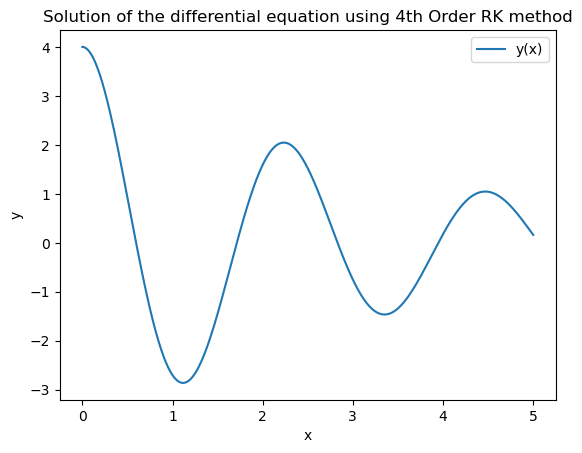

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.01    # In the question the value of h is not enough to generate points to plot nicely
x0, y0, dy0 = 0, 4, 0
x_end = 5

def f1(x, y, z):
    return z

def f2(x, y, z):
    return -0.6 * z - 8 * y

def rk4(x, y, z, h):
    k1 = h * f1(x, y, z)
    l1 = h * f2(x, y, z)

    k2 = h * f1(x + h / 2, y + k1 / 2, z + l1 / 2)
    l2 = h * f2(x + h / 2, y + k1 / 2, z + l1 / 2)

    k3 = h * f1(x + h / 2, y + k2 / 2, z + l2 / 2)
    l3 = h * f2(x + h / 2, y + k2 / 2, z + l2 / 2)
    
    k4 = h * f1(x + h, y + k3, z + l3)
    l4 = h * f2(x + h, y + k3, z + l3)
    
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    dy_next = z + (l1 + 2 * l2 + 2 * l3 + l4) / 6
    
    return y_next, dy_next

x_values = np.arange(x0, x_end + h, h)
y_values = []
y, dy = y0, dy0
for x in x_values:
    y_values.append(y)
    y, dy = rk4(x, y, dy, h)

plt.plot(x_values, y_values, label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the differential equation using 4th Order RK method')
plt.legend()
plt.show()

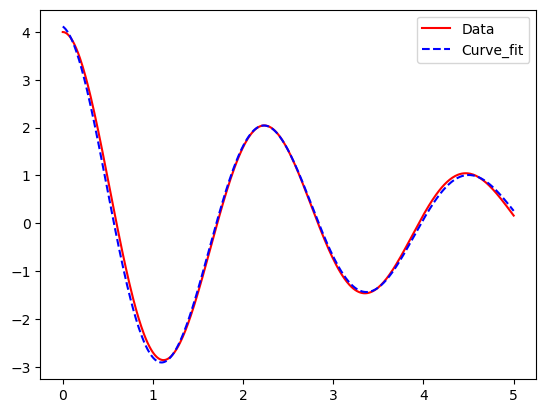

In [2]:
from scipy.optimize import curve_fit

def f(x, A, lamda, k):
    return A * np.exp(-lamda*x) * np.cos(k*np.pi*x)

param, param_cov = curve_fit(f, x_values, y_values)
A, lamda, k = param
ans = np.array([f(i, A, lamda, k) for i in x_values])

plt.plot(x_values, y_values, 'r-', label ='Data')
plt.plot(x_values, ans, 'b--', label = 'Curve_fit')
plt.legend()
plt.show()

In [3]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Function('y')(x) 

eq_l = A * sp.exp(-lamda*x) * sp.sin(k*x)
eq = sp.Eq(y, eq_l)

print('The solution of the given differential equation:')
eq

The solution of the given differential equation:


Eq(y(x), 4.11638346023314*exp(-0.31071789629704*x)*sin(0.880655915999088*x))

In [4]:
m = sp.Symbol('m')

eq = sp.Eq(m**2 + 0.6*m + 8, 0)
sp.solve(eq, m)

[-0.3 - 2.81247222208505*I, -0.3 + 2.81247222208505*I]

### Q2.
Develop a code to generate pseudo random numbers using the linear congruent
method discussed in the Lab. Using the set of parameters $(a, c, M, x_0) = (57, 1, 256, 10)$, determine the period, i.e., how many numbers are generated before
the sequence starts repeating itself.

In [5]:
def linear_congruent(a, c, M, x0, n=1000):
    sequence = [x0]
    for _ in range(n - 1):
        x_next = (a * sequence[-1] + c) % M
        if x_next == x0:
            break
        sequence.append(x_next)
    return sequence

a, c, M, x0 = 57, 1, 256, 10
sequence = linear_congruent(a, c, M, x0)
period = len(sequence)

print('Generated sequence:', sequence)
print('\nPeriod of the sequence:', period)

Generated sequence: [10, 59, 36, 5, 30, 175, 248, 57, 178, 163, 76, 237, 198, 23, 32, 33, 90, 11, 116, 213, 110, 127, 72, 9, 2, 115, 156, 189, 22, 231, 112, 241, 170, 219, 196, 165, 190, 79, 152, 217, 82, 67, 236, 141, 102, 183, 192, 193, 250, 171, 20, 117, 14, 31, 232, 169, 162, 19, 60, 93, 182, 135, 16, 145, 74, 123, 100, 69, 94, 239, 56, 121, 242, 227, 140, 45, 6, 87, 96, 97, 154, 75, 180, 21, 174, 191, 136, 73, 66, 179, 220, 253, 86, 39, 176, 49, 234, 27, 4, 229, 254, 143, 216, 25, 146, 131, 44, 205, 166, 247, 0, 1, 58, 235, 84, 181, 78, 95, 40, 233, 226, 83, 124, 157, 246, 199, 80, 209, 138, 187, 164, 133, 158, 47, 120, 185, 50, 35, 204, 109, 70, 151, 160, 161, 218, 139, 244, 85, 238, 255, 200, 137, 130, 243, 28, 61, 150, 103, 240, 113, 42, 91, 68, 37, 62, 207, 24, 89, 210, 195, 108, 13, 230, 55, 64, 65, 122, 43, 148, 245, 142, 159, 104, 41, 34, 147, 188, 221, 54, 7, 144, 17, 202, 251, 228, 197, 222, 111, 184, 249, 114, 99, 12, 173, 134, 215, 224, 225, 26, 203, 52, 149, 46, 63, 8,

### Q3.
Let $x$ and $y$ are uniform random variables. If $Cov(x, y) \equiv \langle xy \rangle - \langle x \rangle \langle y \rangle$, then find and express $Cov(x + y, x - y)$ in terms of variances defined as $Var(x) \equiv \langle x^2 \rangle - {\langle x \rangle}^2$.

### Ans:
$$Cov(x + y, x - y) \equiv \langle (x + y)(x - y) \rangle - \langle x + y \rangle \langle x - y \rangle$$
$$= \langle x^2 - y^2 \rangle - \langle x + y \rangle \langle x - y \rangle$$
$$= \langle x^2 \rangle - \langle y^2 \rangle - \left( \langle x \rangle + \langle y \rangle \right) \left( \langle x \rangle - \langle y \rangle \right)$$
$$= \langle x^2 \rangle - \langle y^2 \rangle - \langle x \rangle \langle x \rangle + \langle x \rangle \langle y \rangle - \langle y \rangle \langle x \rangle + \langle y \rangle \langle y \rangle$$
$$= \langle x^2 \rangle - \langle y^2 \rangle - {\langle x \rangle}^2 + {\langle y \rangle}^2$$
$$= \left( \langle x^2 \rangle - {\langle x \rangle}^2 \right) - \left( \langle y^2 \rangle - {\langle y \rangle}^2 \right)$$
$$= Var(x) - Var(y) \quad QED.$$

### Q4.
The probability distribution function for a discrete random variable $x$ is given as
$$P(x) = \frac{e^{- \lambda} \lambda^x}{x!}$$
where $\lambda > 0$.
Find the mean (i.e., expectation value) and the variance of this random variable.

In [6]:
import sympy as sp

x, λ = sp.symbols('x λ', real=True, positive=True)

P_x = sp.exp(-λ) * λ**x / sp.factorial(x)

mean = sp.summation(x * P_x, (x, 0, sp.oo))
print('Mean:')
mean

Mean:


λ

In [7]:
mean_square = sp.summation(x**2 * P_x, (x, 0, sp.oo))
variance = mean_square - mean**2
print('Variance:')
variance.simplify()

Variance:


λ

### Q5.
Using Monte Carlo simulation, eavluate the following ten-dimentional integral:
$$ I = \int_{0}^{1} dx_1 \int_{0}^{1} dx_2 \; \dots \int_{0}^{1} dx_{10} \; (x_1 + x_2 + \dots + x_{10})^2 $$

In [8]:
import numpy as np

def f(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):
    return (x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10)**2

a, b, n, N, I, x, s = 0, 1, 10, int(10e4), [], [], 0

for _ in range(n):
    for _ in range(10):
        np.random.seed(np.random.randint(N))
        x.append(np.random.uniform(a, b, size=N))

    for i in range(N):
        s = s + f(x[0][i], x[1][i], x[2][i], x[3][i], x[4][i], x[5][i], x[6][i], x[7][i], x[8][i], x[9][i])
    I.append((b - a)**10 * (s/N))
    s = 0
print(f'The value of the given integration using Monte Carlo is: {np.sum(I)/n}')

The value of the given integration using Monte Carlo is: 25.759179524684708


### Alternate Way

In [9]:
import numpy as np

def integrand(x):
    return np.sum(x, axis=0)**2

a, b = 0, 1
n = 10
N = int(1e5)
I_values = []

for _ in range(n):
    np.random.seed(np.random.randint(N))
    x = np.random.uniform(a, b, size=(10, N))
    integrand_values = integrand(x)
    integral_estimate = (b - a)**10 * np.mean(integrand_values)
    I_values.append(integral_estimate)
    
final_estimate = np.mean(I_values)

print(f'The value of the given integration using Monte Carlo is: {final_estimate}')


The value of the given integration using Monte Carlo is: 25.84265341501382


### Q6.
Develop a code for a particle exhibiting two-dimensional random walk. Also, find and plot the root-mean-square displacement as a function of time.

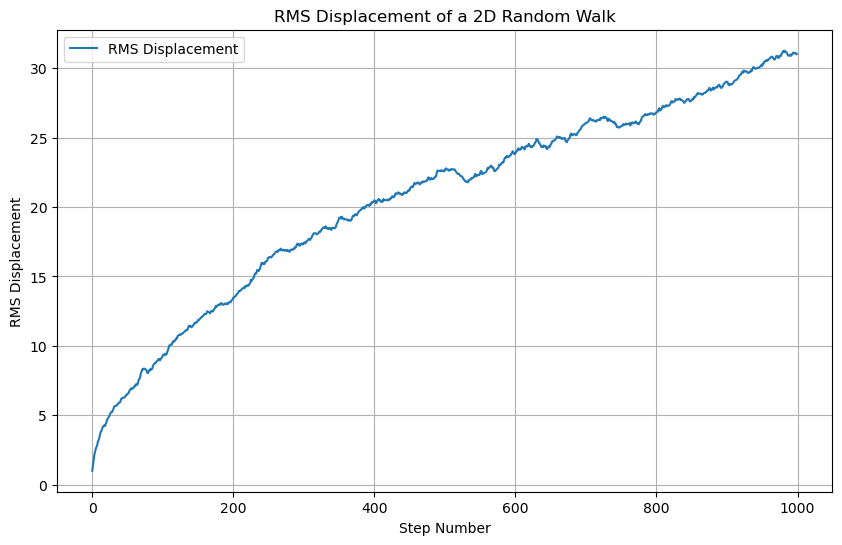

In [10]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 1000
num_walks = 100

def random_walk_2d(num_steps):
    steps = np.random.choice([-1, 1], size=(num_steps, 2))
    path = np.cumsum(steps, axis=0)
    return path

all_walks = np.zeros((num_walks, num_steps, 2))

for i in range(num_walks):
    all_walks[i] = random_walk_2d(num_steps)

mean_square_displacement = np.mean(all_walks**2, axis=(0, 2))

rms_displacement = np.sqrt(mean_square_displacement)

plt.figure(figsize=(10, 6))
plt.plot(rms_displacement, label='RMS Displacement')
plt.xlabel('Step Number')
plt.ylabel('RMS Displacement')
plt.title('RMS Displacement of a 2D Random Walk')
plt.legend()
plt.grid()
plt.show()

### Q7.
By applying the Numerov’s algorithm, develop a code to solve the following differential
equation in the interval $[0,1]$:
$$\frac{d^2y}{dx^2} = - 4 \pi^2 y$$
where $y(0) = 1$, $y'(0) = 0$.

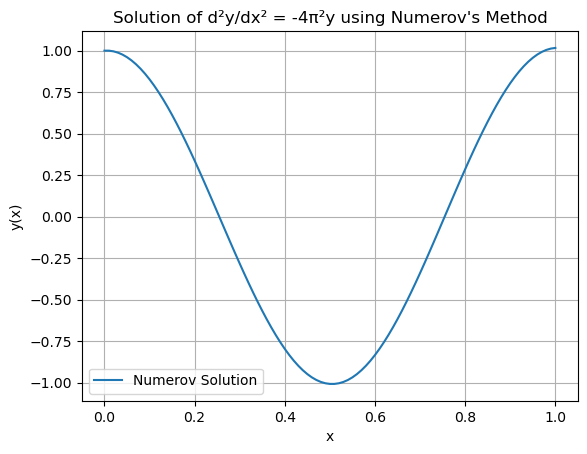

In [11]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
L = 1
N = 100
h = L / N

x = np.linspace(0, L, N+1)
y = np.zeros(N+1)

y[0] = 1
y[1] = y[0] + h * 0

# Numerov method
for n in range(1, N):
    f_n = -4 * pi**2 * y[n]
    f_nm1 = -4 * pi**2 * y[n-1]
    y[n+1] = 2 * y[n] - y[n-1] + (h**2 / 12) * (f_n + 10 * f_n + f_nm1)

# Plot the result
plt.plot(x, y, label='Numerov Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Solution of d²y/dx² = -4π²y using Numerov's Method")
plt.legend()
plt.grid()
plt.show()

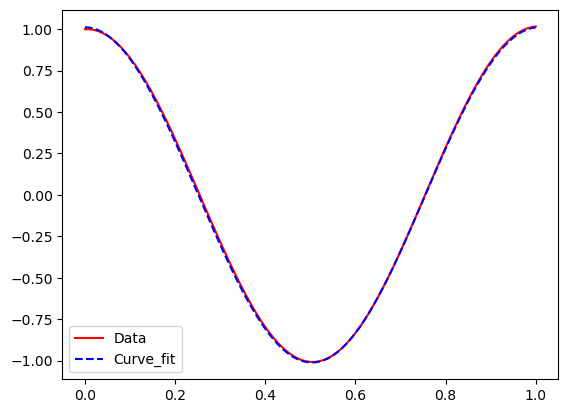

In [12]:
from scipy.optimize import curve_fit

def f(x, A, k):
    return A * np.cos(k*np.pi*x)

param, param_cov = curve_fit(f, x, y)
A, k = param
ans = np.array([f(i, A, k) for i in x])

plt.plot(x, y, 'r-', label ='Data')
plt.plot(x, ans, 'b--', label = 'Curve_fit')
plt.legend()
plt.show()

In [13]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Function('y')(x)

eq_l = A * sp.cos(k*sp.pi*x)

print("The solution of given differential equation using Numerov's Method is:")
sp.Eq(y, eq_l)

The solution of given differential equation using Numerov's Method is:


Eq(y(x), 1.01198014219484*cos(1.98637089072484*pi*x))

In [14]:
import sympy as sp

m = sp.Symbol('m')

eq = sp.Eq(m**2 + 4*sp.pi**2, 0)

sp.solve(eq, m)

[-2*I*pi, 2*I*pi]

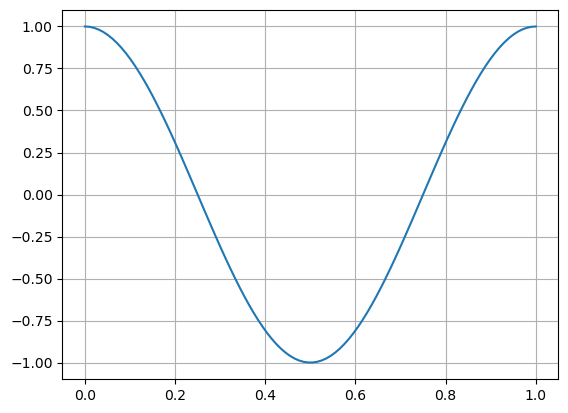

In [15]:
import numpy as np

def y(x):
    return np.cos(2*np.pi*x)

x = np.linspace(0, 1, 100)

plt.plot(x, y(x))
plt.grid()
plt.show()

In [17]:
x = [0, 1, 2]
y = [4, 5, 6]
c = []

for i in range(3):
    c.append(x[i]**2 + y[i]**2)
c

[16, 26, 40]

In [22]:
x = np.asarray(x)
y = np.asarray(y)

np.sqrt(x**2 + y**2)

array([4.        , 5.09901951, 6.32455532])